In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

In [2]:
dane = pd.read_csv("../Data/exercise.csv")
nie_znane = dane[40:60]
print(dane)

        y    x1     x2
0   15.68  6.87  14.09
1    6.18  4.40   4.35
2   18.10  0.43  18.09
3    9.07  2.73   8.65
4   17.97  3.25  17.68
5   10.04  5.30   8.53
6   20.74  7.08  19.50
7    9.76  9.73   0.72
8    8.23  4.51   6.88
9    6.52  6.40   1.26
10  15.69  5.72  14.62
11  15.51  6.28  14.18
12  20.61  6.14  19.68
13  19.58  8.26  17.75
14   9.72  9.41   2.44
15  16.36  2.88  16.10
16  18.30  5.74  17.37
17  13.26  0.45  13.25
18  12.10  3.74  11.51
19  18.15  5.03  17.44
20  16.80  9.67  13.74
21  16.55  3.62  16.15
22  18.79  2.54  18.62
23  15.68  9.15  12.74
24   4.08  0.69   4.02
25  15.45  7.97  13.24
26  13.44  2.49  13.21
27  20.86  9.81  18.41
28  16.05  7.56  14.16
29   6.00  0.98   5.92
30   3.29  0.65   3.22
31   9.41  9.00   2.74
32  10.76  7.83   7.39
33   5.98  0.26   5.97
34  19.23  3.64  18.89
35  15.67  9.28  12.63
36   7.04  5.66   4.18
37  21.63  9.71  19.32
38  17.84  9.36  15.19
39   7.49  0.88   7.43
40    NaN  9.87  10.43
41    NaN  9.99  15.72
42    NaN  

In [3]:
results = smf.ols('y ~ x1 + x2', data=dane).fit()
wyn=results.params
wyn

Intercept    1.315135
x1           0.514810
x2           0.806920
dtype: float64

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        09:00:28   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c:\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_jitter : Removed 20 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


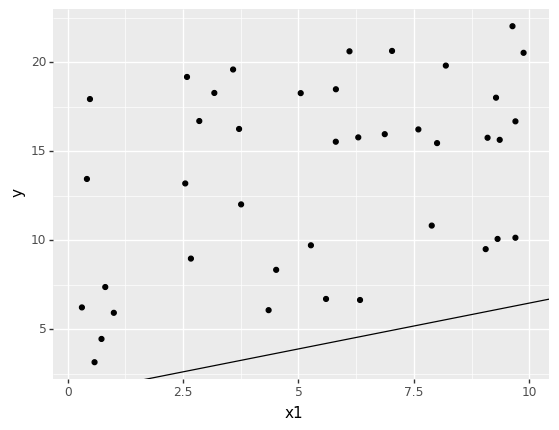

<ggplot: (-2109202771)>

In [5]:
fig1=(p9.ggplot(p9.aes(x='x1',y='y'),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))
fig1

c:\python38\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_jitter : Removed 20 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


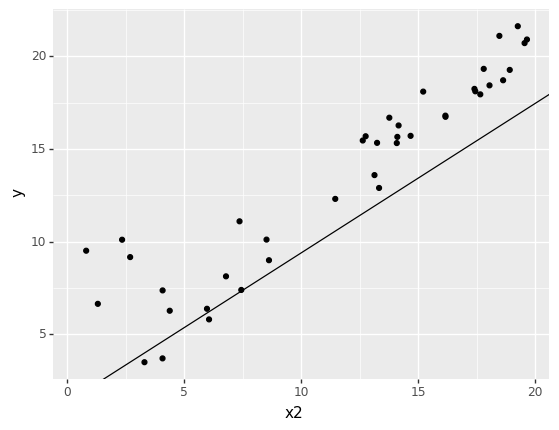

<ggplot: (-2108119593)>

In [6]:
fig2=(p9.ggplot(p9.aes(x='x2',y='y'),data=dane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2'])))
fig2

<ipython-input-7-de11602ba01c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_pred']=results.predict()
<ipython-input-7-de11602ba01c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals']=df['y']-df['y_pred']


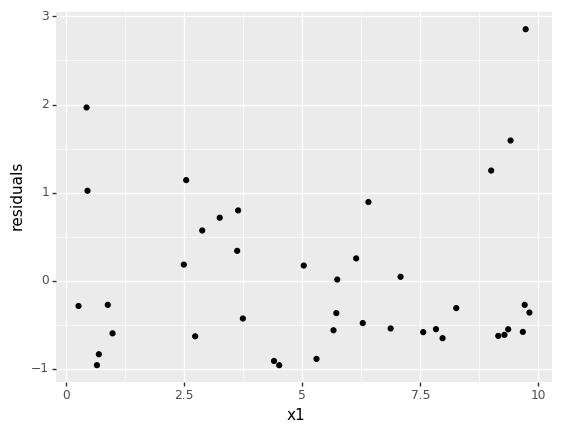

<ggplot: (39393991)>

In [7]:
df=dane[0:40]
df['y_pred']=results.predict()
df['residuals']=df['y']-df['y_pred']
fig1_res=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=df)
      +p9.geom_point())
fig1_res

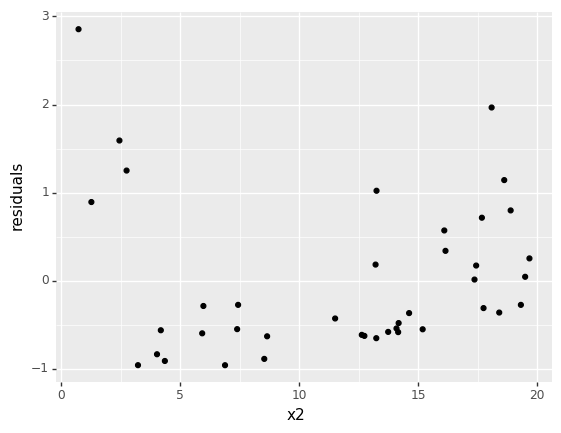

<ggplot: (39410893)>

In [8]:
fig2_res=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=df)
      +p9.geom_point())
fig2_res

In [9]:
#Predicting
prediction=[]
for i in range(40,60):
    prediction.append(wyn["Intercept"]+nie_znane.loc[i]['x1']*wyn['x1']+nie_znane.loc[i]['x2']*wyn['x2'])
nie_znane['y_pred']=prediction
nie_znane

<ipython-input-9-4f5649963756>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nie_znane['y_pred']=prediction


,y,x1,x2,y_pred
40,NaN,9.87,10.43,14.812484
41,NaN,9.99,15.72,19.142865
42,NaN,8.39,0.35,5.916816
43,NaN,0.80,10.91,10.530475
44,NaN,9.58,15.82,19.012485
45,NaN,4.82,11.90,13.398863
46,NaN,2.97,2.46,4.829144
47,NaN,8.80,4.09,9.145767
48,NaN,6.07,1.80,5.892489
49,NaN,0.19,13.54,12.338639


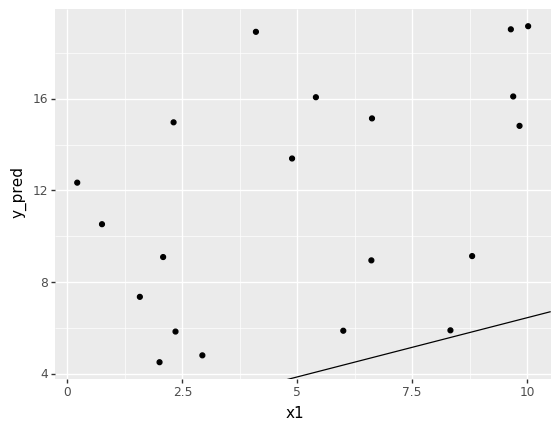

<ggplot: (-2141915285)>

In [10]:
fig1_pred=(p9.ggplot(p9.aes(x='x1',y='y_pred'),data=nie_znane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))
fig1_pred

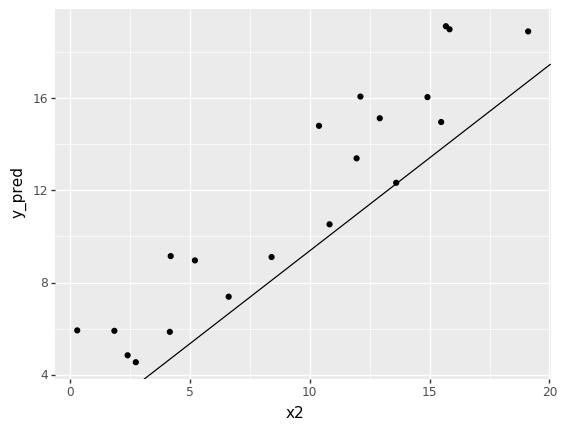

<ggplot: (39410932)>

In [11]:
fig2_pred=(p9.ggplot(p9.aes(x='x2',y='y_pred'),data=nie_znane)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2'])))
fig2_pred